In [8]:
import yfinance as yf
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

<blockquote>
    Creating a Ticket object by specifying the ticker for BTC.
</blockquote>

In [2]:
btc_ticker = yf.Ticker("BTC-USD")
btc_hist = btc_ticker.history(period="max")

In [3]:
btc_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-09-12,21770.148438,22439.181641,21603.896484,22370.449219,50212088965,0,0
2022-09-13,22371.480469,22673.820312,20062.669922,20296.707031,51091116622,0,0
2022-09-14,20184.554688,20467.201172,19793.396484,20241.089844,37872380889,0,0


In [4]:
btc_hist.index = pd.to_datetime(btc_hist.index)

In [5]:
btc_hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

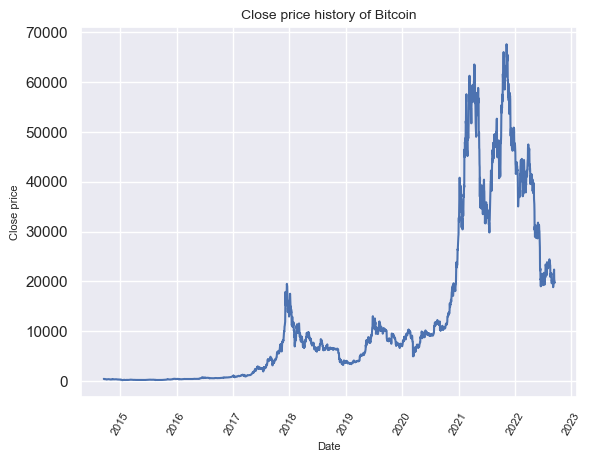

In [9]:
sns.set()
sns.lineplot(data=btc_hist, y='Close', x=btc_hist.index)
plt.ylabel('Close price', font='Arial', size=8)
plt.xlabel('Date', font='Arial', size=8)
plt.title('Close price history of Bitcoin', font='Arial', size=10)
plt.xticks(rotation=60, font='Arial', size=8)
plt.show()

<blockquote>
    Loading the wikipedia sentiment analysis data
</blockquote>

In [10]:
wiki_data = pd.read_csv('C:\\Users\\mailn\\Downloads\\btc_wiki_edits.csv', index_col=0, parse_dates=True)

In [11]:
wiki_data

,sentiment_count,mean_sentiment,neg_percent
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2022-09-13,0.500000,-0.114184,0.183333
2022-09-14,0.500000,-0.114184,0.183333
2022-09-15,0.500000,-0.114184,0.183333
2022-09-16,0.400000,-0.121123,0.172222


In [12]:
btc_data=btc_hist.merge(wiki_data, left_index=True, right_index=True)

In [13]:
btc_data

,Open,High,Low,Close,Volume,sentiment_count,mean_sentiment,neg_percent
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2022-09-12,21770.148438,22439.181641,21603.896484,22370.449219,50212088965,0.533333,-0.147199,0.216667
2022-09-13,22371.480469,22673.820312,20062.669922,20296.707031,51091116622,0.500000,-0.114184,0.183333
2022-09-14,20184.554688,20467.201172,19793.396484,20241.089844,37872380889,0.500000,-0.114184,0.183333
2022-09-15,20242.289062,20318.166016,19636.734375,19701.210938,36389011503,0.500000,-0.114184,0.183333


<blockquote>
    Creating a new variable by shifting the 'Close' price column up by 1 row.
</blockquote>

In [14]:
btc_data['tmrw'] = btc_data['Close'].shift(-1)

In [15]:
btc_data.head()

,Open,High,Low,Close,Volume,sentiment_count,mean_sentiment,neg_percent,tmrw
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008


In [16]:
btc_data.tail()

,Open,High,Low,Close,Volume,sentiment_count,mean_sentiment,neg_percent,tmrw
2022-09-12,21770.148438,22439.181641,21603.896484,22370.449219,50212088965,0.533333,-0.147199,0.216667,20296.707031
2022-09-13,22371.480469,22673.820312,20062.669922,20296.707031,51091116622,0.500000,-0.114184,0.183333,20241.089844
2022-09-14,20184.554688,20467.201172,19793.396484,20241.089844,37872380889,0.500000,-0.114184,0.183333,19701.210938
2022-09-15,20242.289062,20318.166016,19636.734375,19701.210938,36389011503,0.500000,-0.114184,0.183333,19772.583984
2022-09-16,19704.005859,19870.628906,19400.076172,19772.583984,30123362273,0.400000,-0.121123,0.172222,NaN


<blockquote>
    Creating the target variable - 0 means price of next day goes down and 1 means it goes up.
</blockquote>

In [17]:
btc_data['Target'] = (btc_data['tmrw'] > btc_data['Close']).astype(int)

In [19]:
btc_data.head()

,Open,High,Low,Close,Volume,sentiment_count,mean_sentiment,neg_percent,tmrw,Target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1


In [20]:
btc_data['Target'].value_counts()

1    1568
0    1354
Name: Target, dtype: int64

<blockquote>
    Defining the baseline model - Random Forest Classifier.
</blockquote>

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
train = btc_data.iloc[:-200]
test = btc_data.iloc[-200:]
predictors = list(btc_data.columns)
del(predictors[-2:])

In [22]:
predictors

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'sentiment_count',
 'mean_sentiment',
 'neg_percent']

In [23]:
model_rf.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=50, random_state=1)

<blockquote>
    Measuring the performance of the model
</blockquote>

In [24]:
from sklearn.metrics import precision_score
pred_rf = pd.Series(model_rf.predict(test[predictors]), index=test.index)
score=precision_score(test['Target'], pred_rf)
score

0.4935897435897436

<blockquote>
    Defining a function that trains a model and returns a dataframe of actual and predicted values of the response variable. The arguments of the function are the model, train/test data-set and the list of predictors to be used for training.
</blockquote>

In [25]:
def model_predict(model_xgb, train, test, predictors):
    model_xgb.fit(train[predictors], train['Target'])
    pred_xgb = pd.Series(model_xgb.predict(test[predictors]), index=test.index)
    df = pd.concat([test['Target'], pred_xgb], axis=1)
    df.columns=['Actual', 'Prediction']
    return (df)

<blockquote>
    Defining a function to perform back testing using a model. This function trains the model back-to-back, each time using a progressively increasing training data-set. This function internally calls the <i>model_predict</i> function.
</blockquote>

In [26]:
def back_test(model_boost, data, predictors, start=1095, step=150):
    all_predictions=[]
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        pred_boost = model_predict(model_boost, train, test, predictors)
        all_predictions.append(pred_boost)
    return pd.concat(all_predictions)

<blockquote>
    Installing the xgboost module.
</blockquote>

In [110]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=1)

In [28]:
pred_xgb_01 = back_test(model, btc_data, predictors)
score_xgb_01=precision_score(pred_xgb_01['Actual'], pred_xgb_01['Prediction'])
score_xgb_01

0.5091911764705882